This file consists of sentiment analysis implementation for Tourist reviews data

Data preparation and EDA

In [5]:
#Imports 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import seaborn as sns
from wordcloud import WordCloud
import nltk
nltk.download(['stopwords',
               'punkt',
               'wordnet',
               'omw-1.4',
               'vader_lexicon'
               ])


%matplotlib inline

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [6]:
#Read csv to dataframe and display
tourist_data = pd.read_csv("tourist_accommodation_reviews.csv", sep=",", header = 0)
tourist_data.head()

,ID,Review Date,Location,Hotel/Restaurant name,Review
0,rn579778340,Reviewed 1 week ago,Kathu,Thong Dee The Kathu Brasserie,Just been for sunday roast lamb and beef truly...
1,rn576350875,Reviewed 3 weeks ago,Kathu,Thong Dee The Kathu Brasserie,"Quietly set off the main road, nice atmosphere..."
2,rn574921678,Reviewed 4 weeks ago,Kathu,Thong Dee The Kathu Brasserie,I made a reservation for a birthday two days i...
3,rn572905503,"Reviewed April 12, 2018",Kathu,Thong Dee The Kathu Brasserie,We visit here regularly and never fail to be i...
4,rn572364712,"Reviewed April 10, 2018",Kathu,Thong Dee The Kathu Brasserie,Visited this wonderful place on my travels and...


In [7]:
#Describe tourist data
tourist_data.describe()

,ID,Review Date,Location,Hotel/Restaurant name,Review
count,53644,53644,53644,53644,53644
unique,49944,2344,25,537,49938
top,rn564592095,Reviewed 1 week ago,Patong,Da Mario,I have been to this restaurant several times f...
freq,10,616,16403,279,10


In [8]:
#get unique locations in data
tourist_data['Location'].unique()

array([' Kathu', ' Kata Beach', ' Rawai', ' Choeng Thale', ' Karon Beach',
       ' Phuket Town', ' Patong', ' Mai Khao', ' Karon', ' Chalong',
       ' Nai Harn', ' Cape Panwa', ' Sakhu', ' Pa Khlok', ' Kamala',
       ' Bang Tao Beach', ' Thalang District', ' Talat Nuea',
       ' Kata Noi Beach', ' Wichit', ' Nai Yang', ' Talat Yai',
       ' Koh Kaew', ' Nai Thon', ' Ratsada'], dtype=object)

In [9]:
#create a subset for data available for Beach areas
tourist_subset_df = tourist_data[tourist_data['Location'].str.contains('Beach')]

In [10]:
#Get count of subset
tourist_subset_df.count()

ID                       6949
Review Date              6949
Location                 6949
Hotel/Restaurant name    6949
Review                   6949
dtype: int64

In [11]:
#Number of unique Hotels/Restaurants in the data in the beach area
tourist_subset_df['Hotel/Restaurant name'].nunique()

71

In [12]:
#Describe data for subset
tourist_subset_df.describe()

,ID,Review Date,Location,Hotel/Restaurant name,Review
count,6949,6949,6949,6949,6949
unique,6600,1394,4,71,6600
top,rn383156148,Reviewed 1 week ago,Kata Beach,Odysseus Greek Organic Restaurant,"I like this restaurant. Good foods,delicious f..."
freq,10,97,5752,100,10


In [13]:
#get review - testing
tourist_subset_df['Review'].iloc[0]

'Food was tasty and fresh. Fast service. The owner was super friendly and the price was great for 2. Highly recommend the souvlaki.'

Sentiment Analysis

In [14]:
#Get the sentiment components using SentimentIntensityAnalyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sentiment = SentimentIntensityAnalyzer()

print(sentiment.polarity_scores(tourist_subset_df['Review'].iloc[0]))
print(sentiment.polarity_scores(tourist_subset_df['Review'].iloc[1]))
print(sentiment.polarity_scores(tourist_subset_df['Review'].iloc[2]))


{'neg': 0.0, 'neu': 0.525, 'pos': 0.475, 'compound': 0.9459}
{'neg': 0.0, 'neu': 0.503, 'pos': 0.497, 'compound': 0.9571}
{'neg': 0.0, 'neu': 0.502, 'pos': 0.498, 'compound': 0.9771}


In [15]:
#Create new columns in the dataframe to hold these values
tourist_subset_df['compound'] = [sentiment.polarity_scores(review)['compound'] for review in tourist_subset_df['Review']]
tourist_subset_df['neg'] = [sentiment.polarity_scores(review)['neg'] for review in tourist_subset_df['Review']]
tourist_subset_df['neu'] = [sentiment.polarity_scores(review)['neu'] for review in tourist_subset_df['Review']]
tourist_subset_df['pos'] = [sentiment.polarity_scores(review)['pos'] for review in tourist_subset_df['Review']]

<ipython-input-15-afdc6d41eda4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tourist_subset_df['compound'] = [sentiment.polarity_scores(review)['compound'] for review in tourist_subset_df['Review']]
<ipython-input-15-afdc6d41eda4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tourist_subset_df['neg'] = [sentiment.polarity_scores(review)['neg'] for review in tourist_subset_df['Review']]
<ipython-input-15-afdc6d41eda4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a 

In [16]:
#Check for new columns
tourist_subset_df.head()

,ID,Review Date,Location,Hotel/Restaurant name,Review,compound,neg,neu,pos
100,rn581307988,Reviewed yesterday,Kata Beach,Odysseus Greek Organic Restaurant,Food was tasty and fresh. Fast service. The ow...,0.9459,0.000,0.525,0.475
101,rn580977661,Reviewed 2 days ago,Kata Beach,Odysseus Greek Organic Restaurant,Great variety of Greek dishes and fantastic se...,0.9571,0.000,0.503,0.497
102,rn580827047,Reviewed 3 days ago,Kata Beach,Odysseus Greek Organic Restaurant,We had an excellent culinary experience at thi...,0.9771,0.000,0.502,0.498
103,rn580517333,Reviewed 5 days ago,Kata Beach,Odysseus Greek Organic Restaurant,Amazing service and food! Highly recommend if ...,0.9019,0.000,0.783,0.217
104,rn580035619,Reviewed 1 week ago,Kata Beach,Odysseus Greek Organic Restaurant,This restaurant is tucked away near the square...,0.7935,0.045,0.777,0.178


In [17]:
#Describe new columns
tourist_subset_df.describe()

,compound,neg,neu,pos
count,6949.000000,6949.000000,6949.000000,6949.000000
mean,0.659438,0.027798,0.733594,0.238612
std,0.430371,0.052609,0.126750,0.136034
min,-0.975700,0.000000,0.222000,0.000000
25%,0.592700,0.000000,0.650000,0.135000
50%,0.848100,0.000000,0.741000,0.231000
75%,0.928700,0.042000,0.825000,0.332000
max,0.993200,0.508000,1.000000,0.778000


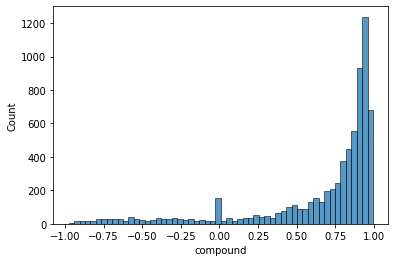

In [18]:
#Plotting distribution for compound data
sns.histplot(tourist_subset_df['compound'])

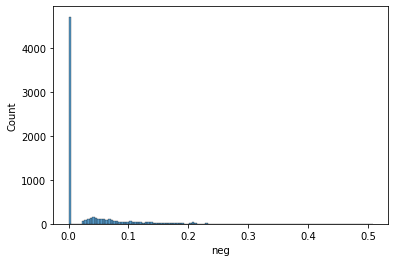

In [19]:
#Plotting distribution for negative sentiment
sns.histplot(tourist_subset_df['neg'])

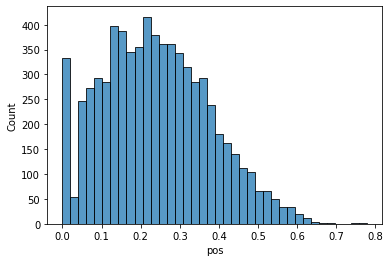

In [20]:
#Plotting distribution for positive sentiment
sns.histplot(tourist_subset_df['pos'])

In [21]:
#Get hotels with highest negative reviews
(tourist_subset_df['compound']<=0).groupby(tourist_subset_df['Hotel/Restaurant name']).sum().nlargest(71)

Hotel/Restaurant name
Dada Yura Restaurant                 40
Buffalo Steak House - Kata Plaza     30
Restaurant Mama Kata (Seafood)       28
Cairo Restaurant                     27
Mali Seafood Restaurant & Bar        26
                                     ..
Sabai Corner                          3
Red Corner                            3
Odysseus Greek Organic Restaurant     2
Curry Delight Indian Restaurant       1
Chekhoff Restaurant and Bar           0
Name: compound, Length: 71, dtype: int64

In [22]:
#create a new dataframe for hotels and percentage of negative reviews
percent_negative = pd.DataFrame((tourist_subset_df['compound']<=0).groupby(tourist_subset_df['Hotel/Restaurant name']).sum()
                                /tourist_subset_df['Hotel/Restaurant name'].groupby(tourist_subset_df['Hotel/Restaurant name']).count()*100,
                                columns = ['% negative reviews']).sort_values(by='% negative reviews', ascending = False)
percent_negative

,% negative reviews
Hotel/Restaurant name,
Dada Yura Restaurant,50.000000
Buffalo Steak House - Kata Plaza,30.000000
Restaurant Mama Kata (Seafood),28.000000
Cairo Restaurant,27.000000
Mali Seafood Restaurant & Bar,26.804124
...,...
Red Corner,3.225806
Sabai Corner,3.000000
Odysseus Greek Organic Restaurant,2.000000


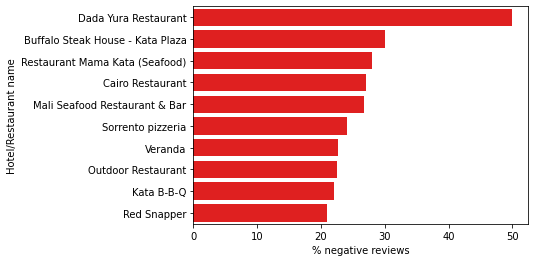

In [23]:
#Bar plot to view the statistics
sns.barplot(data = percent_negative.head(10), x='% negative reviews', y= percent_negative.head(10).index, color='r')

Text Mining

In [24]:
#get stop words to remove them from the text
stop_words = nltk.corpus.stopwords.words('english')

In [25]:
#Function to preprocess text data using lemmatization
def preprocess_text(text):
  tokenized_document = nltk.tokenize.RegexpTokenizer('[a-zA-Z0-9\']+').tokenize(text)
  cleaned_tokens = [word.lower() for word in tokenized_document if word.lower() not in stop_words]
  lemmatized_words = [nltk.stem.WordNetLemmatizer().lemmatize(word) for word in cleaned_tokens]
  return lemmatized_words

In [26]:
#Create dataframe for positive and negative reviews for 'Dada Yura Restaurant'
tourist_subset_df['processed_review'] = tourist_subset_df['Review'].apply(preprocess_text)

reviews_positive_subset = tourist_subset_df.loc[(tourist_subset_df['Hotel/Restaurant name'] == 'Dada Yura Restaurant') 
                                    & (tourist_subset_df['compound']>0),:]

reviews_negative_subset = tourist_subset_df.loc[(tourist_subset_df['Hotel/Restaurant name'] == 'Dada Yura Restaurant') 
                                    & (tourist_subset_df['compound']<=0),:]
reviews_negative_subset.head()

<ipython-input-26-88d671c0aafb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tourist_subset_df['processed_review'] = tourist_subset_df['Review'].apply(preprocess_text)


,ID,Review Date,Location,Hotel/Restaurant name,Review,compound,neg,neu,pos,processed_review
52481,rn470303330,"Reviewed March 26, 2017",Kata Beach,Dada Yura Restaurant,One of the most terrific experience in my life...,-0.2516,0.115,0.812,0.073,"[one, terrific, experience, life, travel, lot,..."
52482,rn468001722,"Reviewed March 17, 2017",Kata Beach,Dada Yura Restaurant,"Service was non existant, staff untidy and mes...",-0.5673,0.228,0.684,0.089,"[service, non, existant, staff, untidy, messy,..."
52483,rn466399193,"Reviewed March 11, 2017",Kata Beach,Dada Yura Restaurant,"Service was terrible , food was very basic and...",-0.7634,0.210,0.735,0.055,"[service, terrible, food, basic, traditional, ..."
52487,rn364836775,"Reviewed April 17, 2016",Kata Beach,Dada Yura Restaurant,Really bad quality of food taste is very bad. ...,-0.6789,0.188,0.687,0.125,"[really, bad, quality, food, taste, bad, stake..."
52489,rn470303330,"Reviewed March 26, 2017",Kata Beach,Dada Yura Restaurant,One of the most terrific experience in my life...,-0.2516,0.115,0.812,0.073,"[one, terrific, experience, life, travel, lot,..."


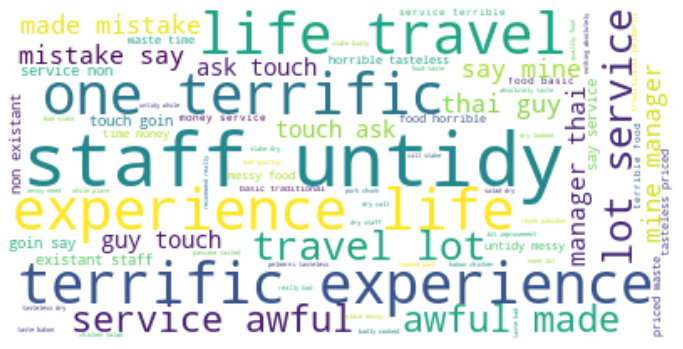

In [27]:
#Built word cloud with words from negative reviews
neg_tokens = [word for review in reviews_negative_subset['processed_review'] for word in review]

wordcloud = WordCloud(background_color='white').generate_from_text(' '.join(neg_tokens))

plt.figure(figsize = (12,12))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")
plt.show()

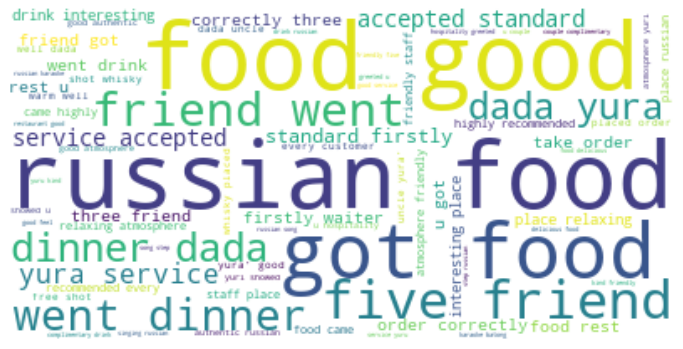

In [28]:
#Create word cloud with words from positive reviews 
pos_tokens = [word for review in reviews_positive_subset['processed_review'] for word in review]

wordcloud = WordCloud(background_color='white').generate_from_text(' '.join(pos_tokens))

plt.figure(figsize = (12,12))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")
plt.show()

Positive review analysis

In [29]:
#display hotels with highest positive reviews
(tourist_subset_df['compound']>0).groupby(tourist_subset_df['Hotel/Restaurant name']).sum().nlargest(71)

Hotel/Restaurant name
Curry Delight Indian Restaurant      99
Odysseus Greek Organic Restaurant    98
Sabai Corner                         97
Red Chair Restaurant                 96
Palm Square                          96
                                     ..
Restaurant Mama Kata (Seafood)       72
Mali Seafood Restaurant & Bar        71
Buffalo Steak House - Kata Plaza     70
Dada Yura Restaurant                 40
Chekhoff Restaurant and Bar          30
Name: compound, Length: 71, dtype: int64

In [30]:
#Create a dataframe with hotels' data with positive reviews
percent_positive = pd.DataFrame((tourist_subset_df['compound']>0).groupby(tourist_subset_df['Hotel/Restaurant name']).sum()
                                /tourist_subset_df['Hotel/Restaurant name'].groupby(tourist_subset_df['Hotel/Restaurant name']).count()*100,
                                columns = ['% positive reviews']).sort_values(by='% positive reviews', ascending = False)
percent_positive

,% positive reviews
Hotel/Restaurant name,
Chekhoff Restaurant and Bar,100.000000
Curry Delight Indian Restaurant,99.000000
Odysseus Greek Organic Restaurant,98.000000
Sabai Corner,97.000000
Red Corner,96.774194
...,...
Mali Seafood Restaurant & Bar,73.195876
Cairo Restaurant,73.000000
Restaurant Mama Kata (Seafood),72.000000


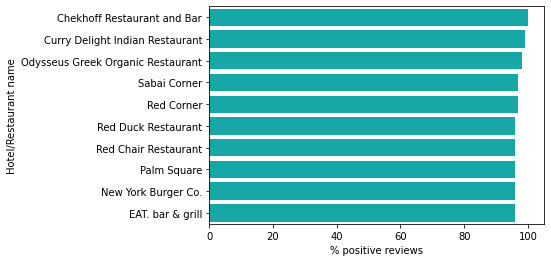

In [31]:
#Plot Hotels with positive reviews
sns.barplot(data = percent_positive.head(10), x='% positive reviews', y= percent_positive.head(10).index, color='c')

In [32]:
#Process text and store positive and negative sentiment words
tourist_subset_df['processed_review'] = tourist_subset_df['Review'].apply(preprocess_text)

reviews_positive_subset_2 = tourist_subset_df.loc[(tourist_subset_df['Hotel/Restaurant name'] == 'Curry Delight Indian Restaurant') 
                                    & (tourist_subset_df['compound']>0),:]

reviews_negative_subset_2 = tourist_subset_df.loc[(tourist_subset_df['Hotel/Restaurant name'] == 'Curry Delight Indian Restaurant') 
                                    & (tourist_subset_df['compound']<=0),:]
reviews_positive_subset_2.head()

<ipython-input-32-0a41466feb71>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tourist_subset_df['processed_review'] = tourist_subset_df['Review'].apply(preprocess_text)


,ID,Review Date,Location,Hotel/Restaurant name,Review,compound,neg,neu,pos,processed_review
12305,rn580105983,Reviewed 6 days ago,Kata Beach,Curry Delight Indian Restaurant,We came across this place by chance and kept c...,0.6694,0.000,0.866,0.134,"[came, across, place, chance, kept, coming, ba..."
12306,rn577365260,Reviewed 2 weeks ago,Kata Beach,Curry Delight Indian Restaurant,This is definitely one of the best places in k...,0.9680,0.031,0.560,0.409,"[definitely, one, best, place, kata, beach, fi..."
12307,rn576757153,Reviewed 2 weeks ago,Kata Beach,Curry Delight Indian Restaurant,Found this place while wondering the streets o...,0.9334,0.031,0.683,0.286,"[found, place, wondering, street, kata, must, ..."
12308,rn576466274,Reviewed 3 weeks ago,Kata Beach,Curry Delight Indian Restaurant,"Excellent food and service. ""Safe""choice if yo...",0.9186,0.000,0.613,0.387,"[excellent, food, service, safe, choice, spicy..."
12309,rn576001020,Reviewed 3 weeks ago,Kata Beach,Curry Delight Indian Restaurant,I’m a huge fan of Indian food. Thai and Indian...,0.8020,0.000,0.801,0.199,"[huge, fan, indian, food, thai, indian, food, ..."


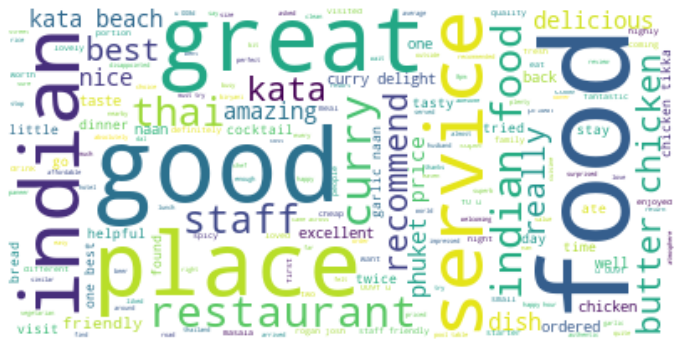

In [33]:
#Create word cloud using words from positive reviews
pos_tokens = [word for review in reviews_positive_subset_2['processed_review'] for word in review]

wordcloud = WordCloud(background_color='white').generate_from_text(' '.join(pos_tokens))

plt.figure(figsize = (12,12))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")
plt.show()

Sentiment Classification

In [34]:
#Display final dataset
tourist_subset_df

,ID,Review Date,Location,Hotel/Restaurant name,Review,compound,neg,neu,pos,processed_review
100,rn581307988,Reviewed yesterday,Kata Beach,Odysseus Greek Organic Restaurant,Food was tasty and fresh. Fast service. The ow...,0.9459,0.000,0.525,0.475,"[food, tasty, fresh, fast, service, owner, sup..."
101,rn580977661,Reviewed 2 days ago,Kata Beach,Odysseus Greek Organic Restaurant,Great variety of Greek dishes and fantastic se...,0.9571,0.000,0.503,0.497,"[great, variety, greek, dish, fantastic, servi..."
102,rn580827047,Reviewed 3 days ago,Kata Beach,Odysseus Greek Organic Restaurant,We had an excellent culinary experience at thi...,0.9771,0.000,0.502,0.498,"[excellent, culinary, experience, new, restaur..."
103,rn580517333,Reviewed 5 days ago,Kata Beach,Odysseus Greek Organic Restaurant,Amazing service and food! Highly recommend if ...,0.9019,0.000,0.783,0.217,"[amazing, service, food, highly, recommend, lo..."
104,rn580035619,Reviewed 1 week ago,Kata Beach,Odysseus Greek Organic Restaurant,This restaurant is tucked away near the square...,0.7935,0.045,0.777,0.178,"[restaurant, tucked, away, near, square, went,..."
...,...,...,...,...,...,...,...,...,...,...
53050,rn106057445,"Reviewed April 29, 2011",Kata Beach,Mali Seafood Restaurant & Bar,Large range with western choices and good loca...,0.7003,0.000,0.873,0.127,"[large, range, western, choice, good, location..."
53051,rn101870163,"Reviewed March 28, 2011",Kata Beach,Mali Seafood Restaurant & Bar,was there today. food is average I would say. ...,-0.2023,0.043,0.957,0.000,"[today, food, average, would, say, prawn, pric..."
53052,rn95346942,"Reviewed February 2, 2011",Kata Beach,Mali Seafood Restaurant & Bar,"Mali is a great, cheap friendly restaurant wit...",0.8807,0.000,0.793,0.207,"[mali, great, cheap, friendly, restaurant, big..."
53053,rn90299395,"Reviewed December 20, 2010",Kata Beach,Mali Seafood Restaurant & Bar,"We dined here in December, 2010. The food was ...",0.5187,0.024,0.859,0.117,"[dined, december, 2010, food, barely, edible, ..."


In [35]:
#Create a new column Result based on compound values, to be used as label
def get_result(x):
    if x <= 0:
        return 'Negative'
    else:
        return 'Positive'

tourist_subset_df['Result'] = tourist_subset_df['compound'].apply(get_result)

tourist_subset_df


<ipython-input-35-f95247964cce>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tourist_subset_df['Result'] = tourist_subset_df['compound'].apply(get_result)


,ID,Review Date,Location,Hotel/Restaurant name,Review,compound,neg,neu,pos,processed_review,Result
100,rn581307988,Reviewed yesterday,Kata Beach,Odysseus Greek Organic Restaurant,Food was tasty and fresh. Fast service. The ow...,0.9459,0.000,0.525,0.475,"[food, tasty, fresh, fast, service, owner, sup...",Positive
101,rn580977661,Reviewed 2 days ago,Kata Beach,Odysseus Greek Organic Restaurant,Great variety of Greek dishes and fantastic se...,0.9571,0.000,0.503,0.497,"[great, variety, greek, dish, fantastic, servi...",Positive
102,rn580827047,Reviewed 3 days ago,Kata Beach,Odysseus Greek Organic Restaurant,We had an excellent culinary experience at thi...,0.9771,0.000,0.502,0.498,"[excellent, culinary, experience, new, restaur...",Positive
103,rn580517333,Reviewed 5 days ago,Kata Beach,Odysseus Greek Organic Restaurant,Amazing service and food! Highly recommend if ...,0.9019,0.000,0.783,0.217,"[amazing, service, food, highly, recommend, lo...",Positive
104,rn580035619,Reviewed 1 week ago,Kata Beach,Odysseus Greek Organic Restaurant,This restaurant is tucked away near the square...,0.7935,0.045,0.777,0.178,"[restaurant, tucked, away, near, square, went,...",Positive
...,...,...,...,...,...,...,...,...,...,...,...
53050,rn106057445,"Reviewed April 29, 2011",Kata Beach,Mali Seafood Restaurant & Bar,Large range with western choices and good loca...,0.7003,0.000,0.873,0.127,"[large, range, western, choice, good, location...",Positive
53051,rn101870163,"Reviewed March 28, 2011",Kata Beach,Mali Seafood Restaurant & Bar,was there today. food is average I would say. ...,-0.2023,0.043,0.957,0.000,"[today, food, average, would, say, prawn, pric...",Negative
53052,rn95346942,"Reviewed February 2, 2011",Kata Beach,Mali Seafood Restaurant & Bar,"Mali is a great, cheap friendly restaurant wit...",0.8807,0.000,0.793,0.207,"[mali, great, cheap, friendly, restaurant, big...",Positive
53053,rn90299395,"Reviewed December 20, 2010",Kata Beach,Mali Seafood Restaurant & Bar,"We dined here in December, 2010. The food was ...",0.5187,0.024,0.859,0.117,"[dined, december, 2010, food, barely, edible, ...",Positive


In [36]:
#Get counts based on results to check class imbalance
print("\n All data Labels")
print(tourist_subset_df.groupby("Result").count())


 All data Labels
            ID  Review Date  Location  Hotel/Restaurant name  Review  \
Result                                                                 
Negative   772          772       772                    772     772   
Positive  6177         6177      6177                   6177    6177   

          compound   neg   neu   pos  processed_review  
Result                                                  
Negative       772   772   772   772               772  
Positive      6177  6177  6177  6177              6177  


In [37]:
#Tokenised text to vectorised using CountVectorizer to generate Term Frequency Matrix. 
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(tourist_subset_df['processed_review'].map(' '.join))
X = pd.DataFrame(X.toarray(), columns = vectorizer.get_feature_names_out())

X.head()

,00,000,0080,0081,0082,0083,0084,0085,0086,0087,...,zero,zinger,zippy,zlatan,zone,zoom,zow,zucchini,zufrieden,zurich
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
#Split the data into training and testing data
from sklearn.model_selection import train_test_split

y= tourist_subset_df['Result']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size = 0.75, test_size = 0.25, random_state = 99
)

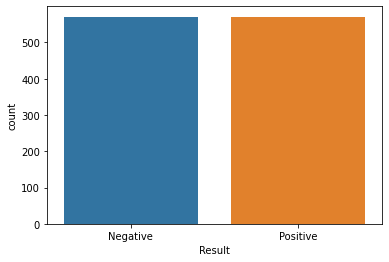

In [39]:
#Use RandomUnderSampler to balance the classes
from imblearn.under_sampling import RandomUnderSampler

resampler = RandomUnderSampler(random_state = 0)
X_train_undersampled, y_train_undersampled = resampler.fit_resample(X_train, y_train)

sns.countplot(x=y_train_undersampled)

In [40]:
#Use Multinomial Naive Bayes classifier to train the model
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(X_train_undersampled, y_train_undersampled)

MultinomialNB()

In [41]:
#Predict outcome and output metrics
y_pred = model.predict(X_test)

from sklearn import metrics
acc =   metrics.accuracy_score(y_test, y_pred)
print('accuracy:%2f\n\n'%(acc))
cm = metrics.confusion_matrix(y_test,y_pred)
print("Confusion Matrix: ")
print(cm, '\n\n')
print("---------------------------------")
result = metrics.classification_report(y_test,y_pred)
print("Classification Report: \n",)
print(result)


accuracy:0.859609


Confusion Matrix: 
[[ 151   50]
 [ 194 1343]] 


---------------------------------
Classification Report: 

              precision    recall  f1-score   support

    Negative       0.44      0.75      0.55       201
    Positive       0.96      0.87      0.92      1537

    accuracy                           0.86      1738
   macro avg       0.70      0.81      0.73      1738
weighted avg       0.90      0.86      0.87      1738



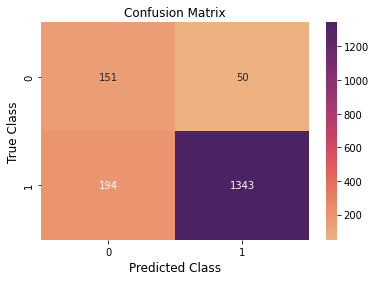

In [42]:
#Confusion matrix heatmap
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix = confusion_matrix(y_test,y_pred) 
ax = sns.heatmap(confusion_matrix, cmap='flare',annot=True, fmt='d') 
plt.xlabel("Predicted Class",fontsize=12) 
plt.ylabel("True Class",fontsize=12) 
plt.title("Confusion Matrix",fontsize=12) 
plt.show()